In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

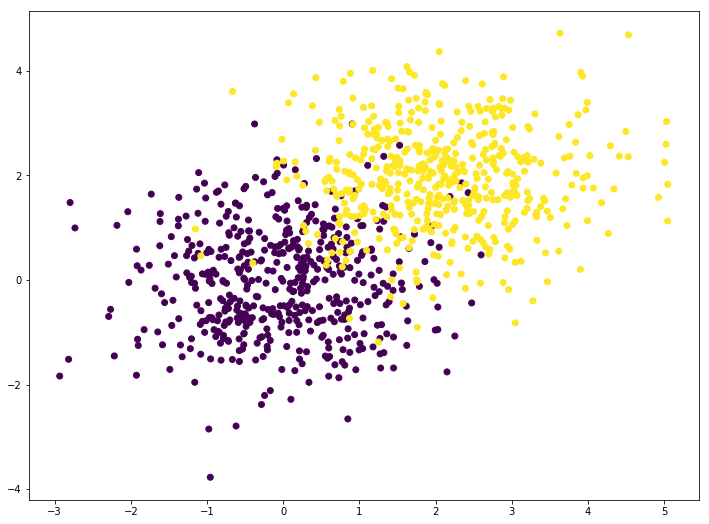

In [5]:
# Simulate the data

N = 1000
D = 2

X0 = np.random.randn(int(N/2), D)
X1 = np.random.randn(int(N/2), D) + np.array([2, 2])
X = np.vstack((X0, X1))
PHI = np.column_stack((np.array([[1]*N]).T, X))

y = np.array([0]*int(N/2) + [1]*int(N/2))

plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:,1], c = y)

In [6]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def classification_rate(y, p):
    return np.mean(y == np.round(p))

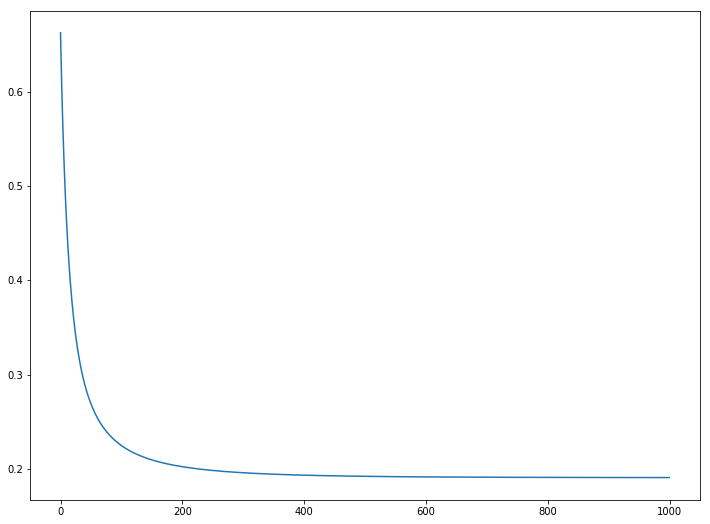

In [11]:
# Build the Model

w = np.random.rand(D + 1)

J = []
eta = 3e-1
epochs = int(1e3)

for t in xrange(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*(1/N)*PHI.T.dot(p - y)
    
plt.figure(figsize=(12,9))
plt.plot(J)

In [12]:
print("Classification Rate: {}".format(classification_rate(y, p)))

Classification Rate: 0.926


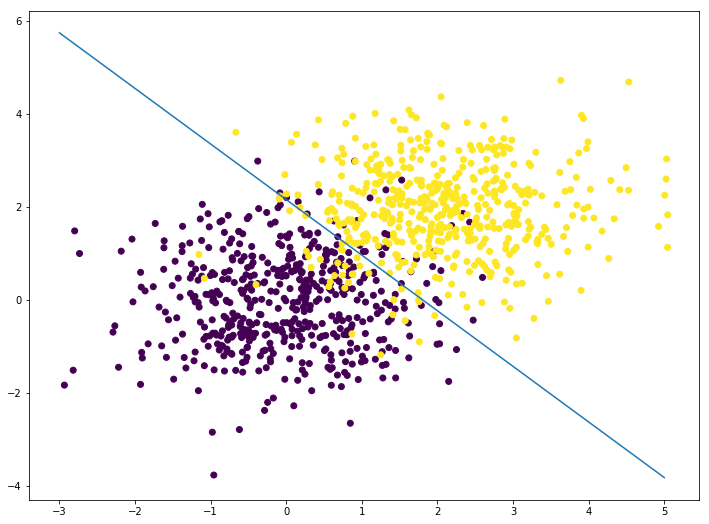

In [15]:
# Visualize the learned decision boundary

dx1 = np.linspace(-3, 5, 10)
dx2 = -(w[0]/w[2]) - (w[1]/w[2])*dx1

plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(dx1, dx2)